# Esercitazione 12
**13  Maggio 2025**

In [1]:
import numpy as np
import scipy.linalg as spLin
from SolveTriangular import *
import matplotlib.pyplot as plt

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [2]:
def eqnorm(A,b):
    G=A.T@A
    condG=np.linalg.cond(G)
    print("Condition Number of G: ", condG)

    f=A.T@b
    # G simmetrica e definita positiva (A rango max)
    L=spLin.cholesky(G,lower=True)
    U=L.T

    z,flag=Lsolve(L,f)

    if flag==0:
        x,flag=Usolve(U,z)

    return x

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [3]:
def qr_ls(A,b):
    n=A.shape[1]
    Q,R=spLin.qr(A)

    h=Q.T@b

    x,flag=Usolve(R[:n,:n],h[:n])
    residuo2=np.linalg.norm(h[n:])
    
    print("residuo 2: ", residuo2)
    return x

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m

Restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [4]:
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=spLin.svd(A)  
    
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    
    d=U.T@b
    d1=d[:k].reshape(k,1) # Seleziono i primi k elementi di d
    s1=s[:k].reshape(k,1) # Seleziono i primi k elementi di s
    
    c=d1/s1
    x=V[:,:k]@c 
    r=np.linalg.norm(d[k:])**2 
    return x,r

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



In [5]:
x_arr=[]
y_arr=[]

x_1 = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
x_arr.append(x_1)
y_1 = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
y_arr.append(y_1)

x_2 = np.array([-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57])
x_arr.append(x_2)
y_2 = np.array([0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1])
y_arr.append(y_2)

x_3 =np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
x_arr.append(x_3)
y_3 = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])
y_arr.append(y_3)
x_4 = np.array([1.001, 1.004, 1.005, 1.0012, 1.0013, 1.0014, 1.0015, 1.0016])
x_arr.append(x_4)
y_4 = np.array([-1.2,-1,-0.98, -0.95, -0.9, -1.15, -1.1, -1])
y_arr.append(y_4)

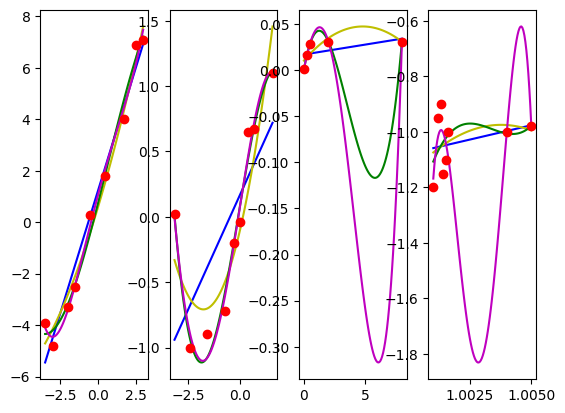

In [6]:
m=x_1.shape[0]
col = ['b','y','g','m']
for j in range(len(x_arr)):
    plt.subplot(1,len(x_arr),j+1)
    #plt.tight_layout()
    #fig.set_size_inches(12,12)
    xs=x_arr[j]
    ys=y_arr[j]
    for n in range(1,5):
        n1=n+1 # gradi di libertà del polinomio
        A=np.vander(xs,increasing=True)[:,:n1] # Slicing per seleizonare solo le prime n+1 colonne
        # print(A)
        coeff_Pn_eqn,r=SVDLS(A,ys)
        # print("Solution EQN: ", coeff_Pn_eqn)
        
        x_val = np.linspace(np.min(xs),np.max(xs),100)
        polEQN = np.polyval(np.flip(coeff_Pn_eqn),x_val)
        residuo_eqn=np.linalg.norm(A@coeff_Pn_eqn-ys)
        
        plt.plot(x_val,polEQN,col[n-1])
    
    plt.plot(xs,ys, 'ro')
plt.show()

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [7]:
coef=np.poly([1,2])
print(coef) # x^2-3x+2
print(np.zeros_like([1,2]))
# excludedCoeff_i = arr[:i]+arr[i+1:]

[ 1. -3.  2.]
[0 0]


In [8]:
def plagr(nodes,j):
    n=nodes.size
    zeros=np.zeros_like(nodes)

    #? --------------------------------------------- ?# mega scuffed
    if j==0:
        zeros=nodes[1:]
    else:
        zeros=np.append(nodes[:j],nodes[j+1:])
    #? --------------------------------------------- ?# mega scuffed
    
    zeros=np.append(nodes[:j],nodes[j+1:]) # one-line based programming.
    
    num=np.poly(zeros)
    den=np.polyval(num,nodes[j])

    p=num/den
    
    return p
    
''' absolute giga based two line code
num=np.poly(np.append(nodes[:j],nodes[j+1:]))
return (num)/(np.polyval(num,nodes[j])) 
'''
    
''' Working test for based programming
nodes = np.array([x for x in range(10)])
for j in range(10):
    #? --------------------------------------------- ?#
    if j==0:
        zeros_s=nodes[1:]
    else:
        zeros_s=np.append(nodes[:j],nodes[j+1:])
    #? --------------------------------------------- ?#
    print("Scuffed: ", zeros_s)
    zeros_b=np.append(nodes[:j],nodes[j+1:])
    print("Based: ", zeros_b)
    print(zeros_b==zeros_s)
'''

' Working test for based programming\nnodes = np.array([x for x in range(10)])\nfor j in range(10):\n    #? --------------------------------------------- ?#\n    if j==0:\n        zeros_s=nodes[1:]\n    else:\n        zeros_s=np.append(nodes[:j],nodes[j+1:])\n    #? --------------------------------------------- ?#\n    print("Scuffed: ", zeros_s)\n    zeros_b=np.append(nodes[:j],nodes[j+1:])\n    print("Based: ", zeros_b)\n    print(zeros_b==zeros_s)\n'

In [9]:
def InterpL(x,y,xv):
    n=x.size
    m=xv.size
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xv)
    pol=L@y
    return pol

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

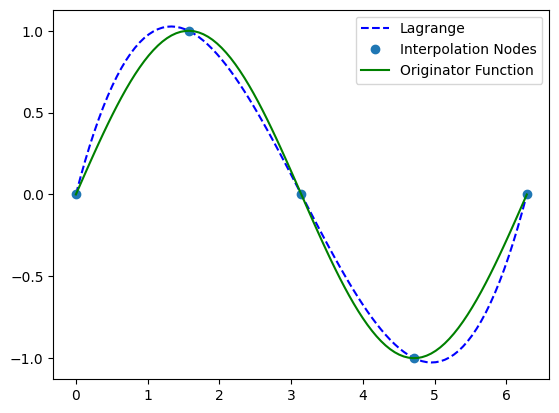

In [10]:
x=np.array([(k*np.pi)/2 for k in range(5)])
y=np.sin(x)
#y_arr=np.array([np.sin(x_arr[y]) for y in range(5)])

xv=np.linspace(np.min(x),np.max(x),100)
polL=InterpL(x,y,xv)

plt.plot(xv,polL,'b--',x,y,'o', xv,np.sin(xv),'g-')
plt.legend(['Lagrange','Interpolation Nodes', 'Originator Function'])

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

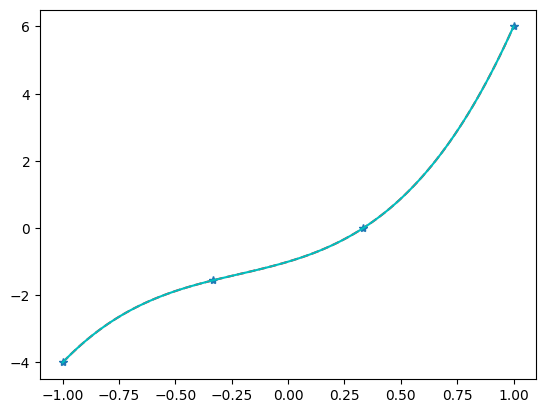

In [11]:
f2=lambda x:3*x**3+2*x**2+2*x-1
x2=np.linspace(-1,1,4)
y2=f2(x2)
xv2=np.linspace(-1,1,100)
polL2=InterpL(x2,y2,xv2)
plt.plot(xv2,polL2,'r--',x2,y2,'*',xv2,f2(xv2),'c-')

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


(13,)


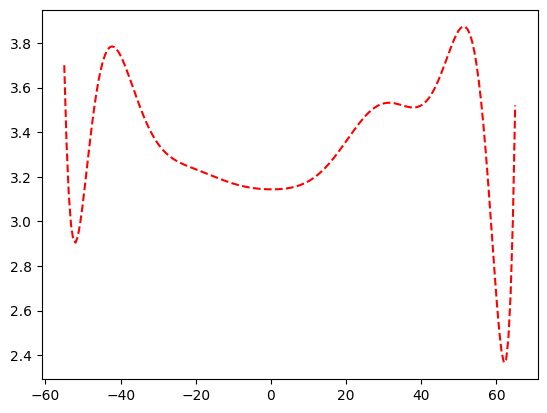

In [18]:
L=np.array([-55, -45, -35, -25, -15, -5  , 5   , 15  , 25  ,   35,   45,   55,   65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

print(L.shape)
lv=np.linspace(np.min(L),np.max(L),200)
polL3=InterpL(L,T,lv)
plt.plot(lv,polL3,'r--')

## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

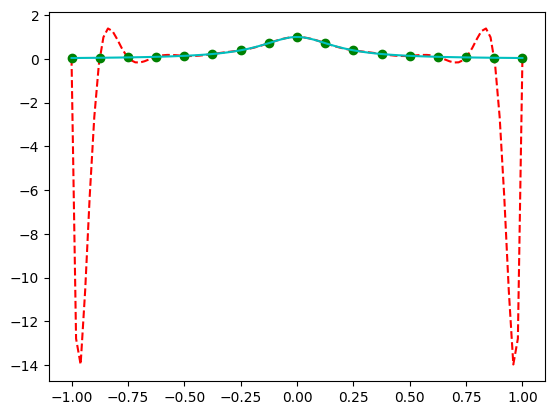

In [13]:
f4=lambda x: 1/(1+25*x**2)
n=16
x4=np.linspace(-1,1,n+1)
y4=f4(x4)
xv4=np.linspace(-1,1,100)

polL4=InterpL(x4,y4,xv4)
plt.plot(xv4,polL4,'r--',x4,y4,'go',xv4,f4(xv4),'c-')

In [14]:
def chebyshef(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    x=np.zeros((n+1,))
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

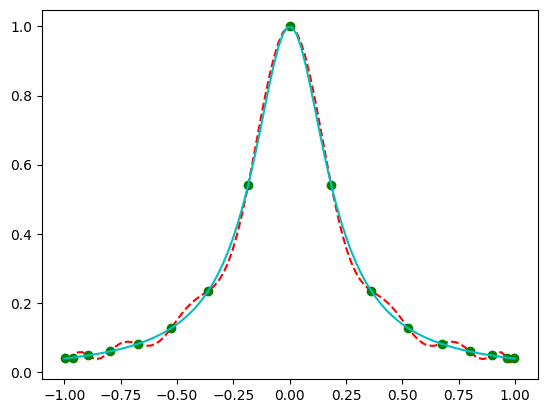

In [15]:
#f4=lambda x: 1/(1+25*x**2)
x4cheb=chebyshef(-1,1,n)
y4cheb=f4(x4cheb)

polL4cheb=InterpL(x4cheb,y4cheb,xv4)
plt.plot(xv4,polL4cheb,'r--',x4cheb,y4cheb,'go',xv4,f4(xv4),'c-')

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


In [16]:
n=10
xe=np.linspace(-1,1,n+1)
xc=chebyshef(-1,1,n+1)
xv6=np.linspace(-1,1,100)

sumL_e=np.zeros((100,1))
sumL_c=np.zeros((100,1))
for i in range(n):
    pe=plagr(xe,i)
    pc=plagr(xc,i)
    sumL_e=sumL_e+np.abs(np.polyval(pe,xv6))
    sumL_c=sumL_c+np.abs(np.polyval(pc,xv6))
Lebesgue_e=np.max(sumL_e)
Lebesgue_c=np.max(sumL_c)
print('Lebesgue for equidistant points', Lebesgue_e,'Lebesgue for Chebyshef points' ,Lebesgue_c)

Lebesgue for equidistant points 29.885233988102055 Lebesgue for Chebyshef points 2.5227281328147835
